In [199]:
import datetime as dt 
import numpy as np 
import talib as ta 
import matplotlib.pyplot as plt 
import yfinance as yf 
import pandas as pd 




In [200]:
# Major World Indices
stock = pd.read_html('https://finance.yahoo.com/world-indices/')[0]
stock

,Symbol,Name,Last Price,Change,% Change,Volume,Intraday High/Low,52 Week Range,Day Chart
0,^GSPC,S&P 500,4783.45,26.95,+0.57%,2.161B,NaN,NaN,NaN
1,^DJI,Dow Jones Industrial Average,37695.73,170.57,+0.45%,279.544M,NaN,NaN,NaN
2,^IXIC,NASDAQ Composite,14969.65,111.94,+0.75%,3.98B,NaN,NaN,NaN
3,^NYA,NYSE COMPOSITE (DJ),16818.88,45.81,+0.27%,0,NaN,NaN,NaN
4,^XAX,NYSE AMEX COMPOSITE INDEX,4570.24,-9.84,-0.21%,0,NaN,NaN,NaN
5,^BUK100P,Cboe UK 100,764.79,0.00,0.00%,0,NaN,NaN,NaN
6,^RUT,Russell 2000,1970.26,2.23,+0.11%,0,NaN,NaN,NaN
7,^VIX,CBOE Volatility Index,12.69,-0.07,-0.55%,0,NaN,NaN,NaN
8,^FTSE,FTSE 100,7651.76,-32.20,-0.42%,0,NaN,NaN,NaN
9,^GDAXI,DAX PERFORMANCE-INDEX,16689.81,1.45,+0.01%,0,NaN,NaN,NaN


In [201]:
# Dropped Null Columns
stock.drop(['Intraday High/Low','52 Week Range','Day Chart'],axis= 1)

,Symbol,Name,Last Price,Change,% Change,Volume
0,^GSPC,S&P 500,4783.45,26.95,+0.57%,2.161B
1,^DJI,Dow Jones Industrial Average,37695.73,170.57,+0.45%,279.544M
2,^IXIC,NASDAQ Composite,14969.65,111.94,+0.75%,3.98B
3,^NYA,NYSE COMPOSITE (DJ),16818.88,45.81,+0.27%,0
4,^XAX,NYSE AMEX COMPOSITE INDEX,4570.24,-9.84,-0.21%,0
5,^BUK100P,Cboe UK 100,764.79,0.00,0.00%,0
6,^RUT,Russell 2000,1970.26,2.23,+0.11%,0
7,^VIX,CBOE Volatility Index,12.69,-0.07,-0.55%,0
8,^FTSE,FTSE 100,7651.76,-32.20,-0.42%,0
9,^GDAXI,DAX PERFORMANCE-INDEX,16689.81,1.45,+0.01%,0


In [202]:
ticker_list = stock['Symbol'].str.replace('^','').to_list()
ticker_list

['GSPC',
 'DJI',
 'IXIC',
 'NYA',
 'XAX',
 'BUK100P',
 'RUT',
 'VIX',
 'FTSE',
 'GDAXI',
 'FCHI',
 'STOXX50E',
 'N100',
 'BFX',
 'IMOEX.ME',
 'N225',
 'HSI',
 '000001.SS',
 '399001.SZ',
 'STI',
 'AXJO',
 'AORD',
 'BSESN',
 'JKSE',
 'KLSE',
 'NZ50',
 'KS11',
 'TWII',
 'GSPTSE',
 'BVSP',
 'MXX',
 'IPSA',
 'MERV',
 'TA125.TA',
 'CASE30',
 'JN0U.JO']

In [203]:
data = yf.download(ticker_list,period = '1d',start = '2020-1-1',end = '2024-1-11')
data.head()

[                       0%%                      ]

[*********************100%%**********************]  36 of 36 completed

28 Failed downloads:
['N225', 'JN0U.JO', 'GSPTSE', 'BSESN', 'IPSA', 'CASE30', 'TWII', 'MERV', 'TA125.TA', 'JKSE', 'BVSP', 'GDAXI', 'BUK100P', 'GSPC', 'AXJO', 'STI', 'STOXX50E', 'NZ50', 'FTSE', 'AORD', 'IXIC', 'FCHI', 'N100', 'KS11']: Exception('%ticker%: No timezone found, symbol may be delisted')
['MXX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-1-1 -> 2024-1-11)')
['KLSE', 'VIX', 'RUT']: Exception("%ticker%: Period '1d' is invalid, must be one of ['1mo', '3mo', '6mo', 'ytd', '1y', '2y', '5y', '10y', 'max']")


Adj Close                                                   \
              000001.SS     399001.SZ AORD AXJO   BFX BSESN BUK100P BVSP   
Date                                                                       
2020-01-02  3085.197998  10638.820312  NaN  NaN  1.81   NaN     NaN  NaN   
2020-01-03  3083.785889  10656.410156  NaN  NaN  1.78   NaN     NaN  NaN   
2020-01-06  3083.407959  10698.269531  NaN  NaN  1.90   NaN     NaN  NaN   
2020-01-07  3104.802002  10829.049805  NaN  NaN  2.14   NaN     NaN  NaN   
2020-01-08  3066.893066  10706.870117  NaN  NaN  2.18   NaN     NaN  NaN   

                                 ... Volume                             \
           CASE30           DJI  ...   N225  NYA NZ50 RUT STI STOXX50E   
Date                             ...                                     
2020-01-02    NaN           NaN  ...    NaN  NaN  NaN NaN NaN      NaN   
2020-01-03    NaN  28634.900391  ...    NaN  0.0  NaN NaN NaN      NaN   
2020-01-06    NaN  28703.400391  ...    NaN  0.0  NaN NaN NaN      NaN   
2020-01-07    NaN  28583.699219  ...    NaN  0.0  NaN NaN NaN      NaN   
2020-01-08    NaN  28745.099609  ...    NaN  0.0  NaN NaN NaN      NaN   

                                   
           TA125.TA TWII VIX  XAX  
Date                               
2020-01-02      NaN  NaN NaN  NaN  
2020-01-03      NaN  NaN NaN  0.0  
2020-01-06      NaN  NaN NaN  0.0  
2020-01-07      NaN  NaN NaN  0.0  
2020-01-08      NaN  NaN NaN  0.0  

[5 rows x 216 columns]

In [204]:
adj_close = data.dropna(thresh=10,axis=1)['Adj Close']
adj_close.head()
adj_close.describe().T

,count,mean,std,min,25%,50%,75%,max
000001.SS,977.0,3265.023392,226.088792,2660.169922,3092.979980,3269.969971,3447.989990,3715.370117
399001.SZ,977.0,12396.106410,1713.895943,8922.790039,11002.929688,12018.160156,13970.209961,15962.250000
BFX,1013.0,7.333396,7.241385,0.490000,1.570000,3.840000,12.120000,30.540001
DJI,522.0,30765.543736,4203.636583,18591.900391,27688.400391,31048.500000,34596.075195,36799.699219
HSI,512.0,25912.280876,2015.066975,21696.099609,24352.799316,25372.299805,27651.375488,31084.900391
IMOEX.ME,995.0,2980.269046,599.792839,1916.969971,2446.180054,2975.360107,3441.265015,4287.520020
NYA,503.0,14610.792542,2124.237306,8777.379883,12840.299805,15069.599609,16545.700195,17353.800781
XAX,61.0,2138.623923,398.590248,1487.229980,1736.800049,2381.280029,2467.639893,2622.090088


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

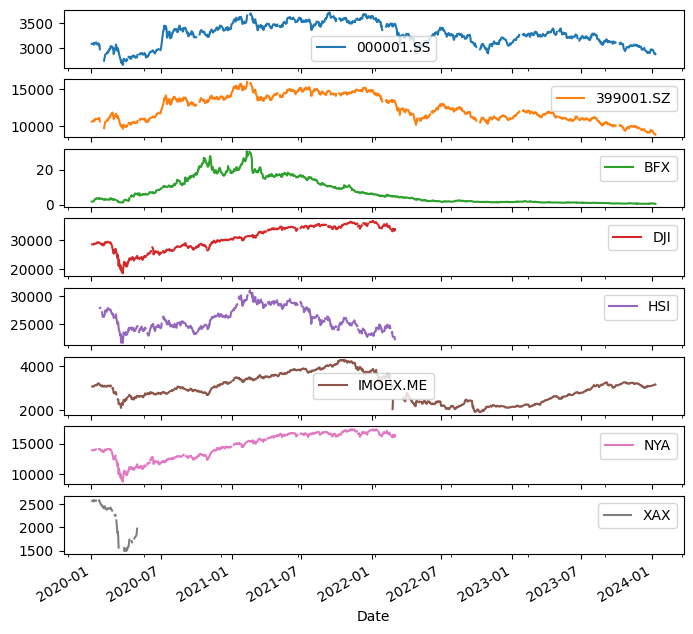

In [205]:
adj_close.plot(figsize = (8,8),subplots = True)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

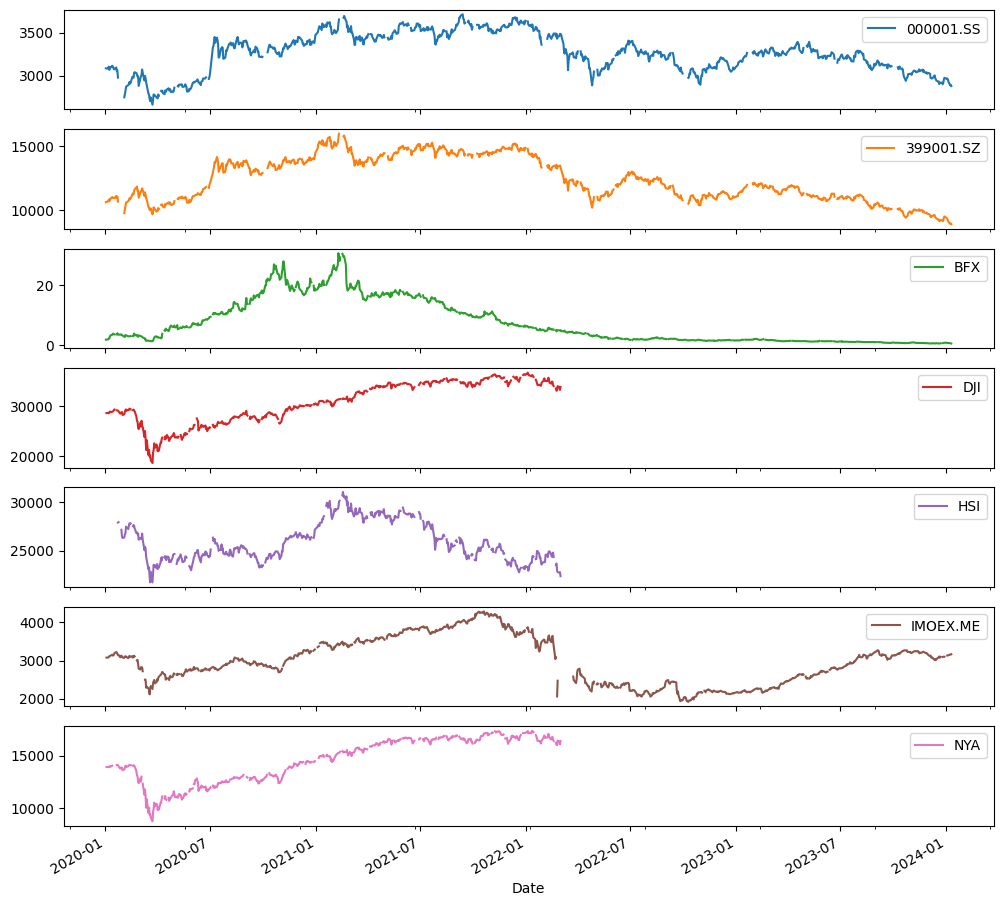

In [206]:
adj_close = adj_close.drop(['XAX'],axis= 1)
adj_close.plot(figsize = (12,12),subplots = True)

In [207]:
# 'DJI' Index Analysis
dji = adj_close['DJI']
dji.resample('4M').mean()

Date
2020-01-31    28880.550000
2020-05-31    24569.870515
2020-09-30    26987.780779
2021-01-31    29529.720855
2021-05-31    32940.269484
2021-09-30    34776.666667
2022-01-31    35485.993750
2022-05-31    34547.971912
2022-09-30             NaN
2023-01-31             NaN
2023-05-31             NaN
2023-09-30             NaN
2024-01-31             NaN
Freq: 4M, Name: DJI, dtype: float64

In [208]:
dji

Date
2020-01-02             NaN
2020-01-03    28634.900391
2020-01-06    28703.400391
2020-01-07    28583.699219
2020-01-08    28745.099609
                  ...     
2024-01-04             NaN
2024-01-05             NaN
2024-01-08             NaN
2024-01-09             NaN
2024-01-10             NaN
Name: DJI, Length: 1047, dtype: float64

In [209]:
dji.shift(1)

Date
2020-01-02             NaN
2020-01-03             NaN
2020-01-06    28634.900391
2020-01-07    28703.400391
2020-01-08    28583.699219
                  ...     
2024-01-04             NaN
2024-01-05             NaN
2024-01-08             NaN
2024-01-09             NaN
2024-01-10             NaN
Name: DJI, Length: 1047, dtype: float64

<Axes: xlabel='Date'>

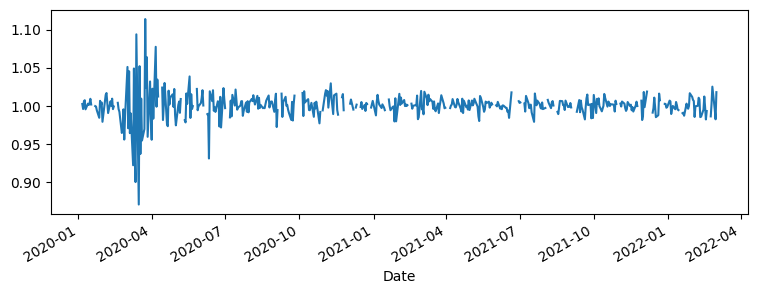

In [210]:
dji_per_change = dji/(dji.shift(1) - 1)
dji_per_change.plot(figsize = (9,3))

<Axes: xlabel='Date'>

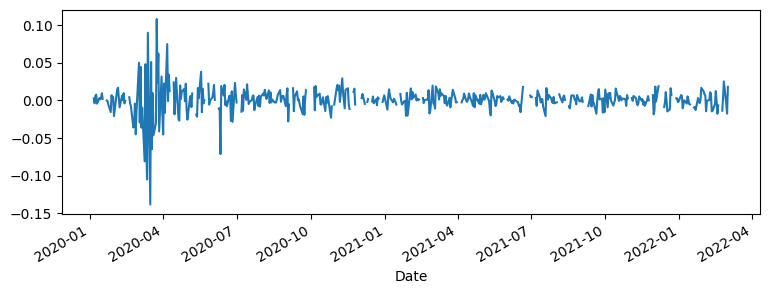

In [211]:
dji_log_return_shift = np.log(dji/dji.shift(1))
dji_log_return_shift.plot(figsize = (9,3))

<Axes: >

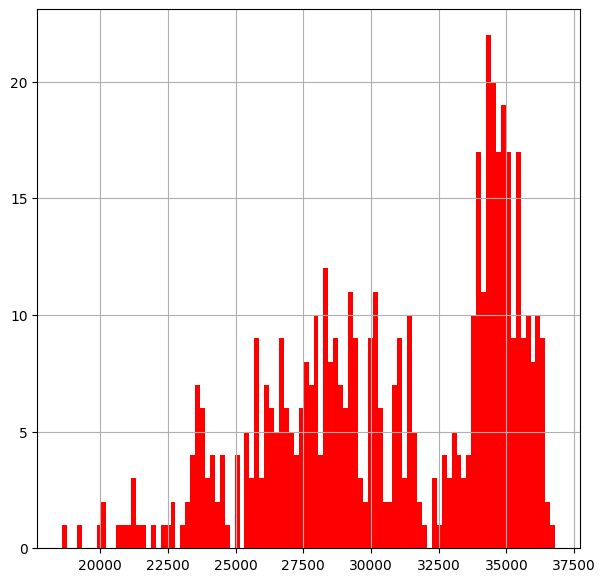

In [212]:
dji.hist(bins =100,figsize = (7,7),color = 'Red')

<Axes: >

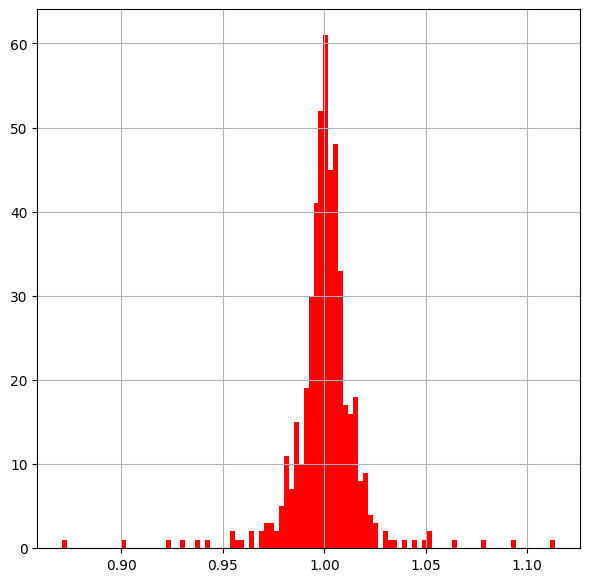

In [214]:
dji_per_change.hist(bins = 100,figsize = (7,7),color = 'red')